# Heart Failure Dataset

### *To Predict Heart Disease*

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.shape

(918, 12)

### no need to determine estimates of location

let's divide the data set into heart disease +ve(1) and -ve(0) data sets

## Let's Explore Relationships

In [5]:
positive, negative = [x for _, x in heart.groupby(heart['HeartDisease'] == 0)]
positive.head(2) # data set with +ve heart disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [6]:
negative.head(2)  # dataset with -ve heart disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


##### for +ve dataset examine the relationship between age groups and occurence of heart disease

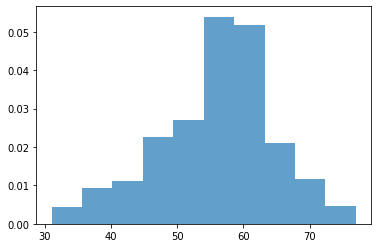

In [7]:
ax = plt.hist(data=positive, bins=10, x='Age', density=1, histtype='bar', alpha=0.7)


<AxesSubplot:ylabel='Frequency'>

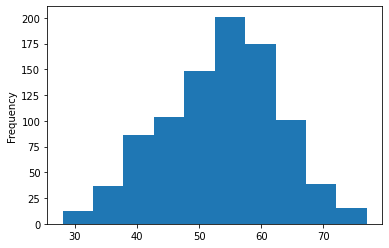

In [8]:
heart['Age'].plot.hist()

the above graph shows that major age group is those of 50s to 70s, the average age of man

let's examine the correlation b/w different features in the mein dataset

<AxesSubplot:>

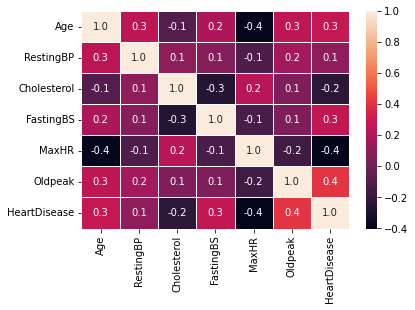

In [9]:
import numpy as np

corr = heart.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,linewidths=.5,fmt=".1f")

```the above heatmap represents correlation b/w different features;
- there is a strong -ve correlation b/w Age n MaxHR, MaxHR n HeartDisease, FastingBS n Cholesterol
- there is a medium level -ve correlation b/w Cholesterol n HeartDisease,
- somewhat +ve correlation b/w Oldpeak n HeartDisease, FastingBS n HeartDisease
- there exists no strong +ve correlation```

`Max-Heart-Rate is an indication for heart activity. So, MaxHR will be counted as symbol rather than as cause of heart disease.`

`Age and MaxHR do have relation. Their ration may be counted as a sign for a heart disease.`

`*** There may be a relation b/w Age and Heart Disease, as Age may also be a factor.`

`Fasting reduces blood sugar and cholesterol level.
+ve sugar in Fasting is also a factor to heart disease. And, cholesterol too.`

```Normal cholesterol levels are:
- age 19 n below: less than 170 mg/dl
- age 20 n over: 125-200 mg/dl```

`+ve Fasting blood sugar means diabetes. Diabetes is among major factors of heart diseases.`

let's visualize features' relation

### **Normal and Patients**

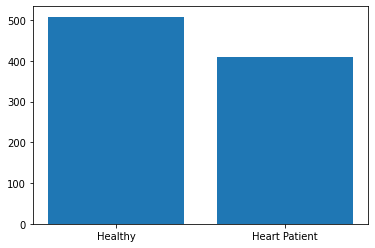

In [10]:
health = heart['HeartDisease']
healthy = {1:'Heart Patient', 0:'Healthy'}
health = health.map(healthy)
ax = plt.bar(data=health, x=health.unique(), height=health.value_counts())

conclusion; in our data set about 400 objects are heart patients

#### Age - MaxHR

MaxHR for an age is calculated as; MaxHR = 220-age
- for moderately intense activity Heart Rate should be 64% - 76% of MaxHR
- for vigorous activity Heart Rate should be 77% - 94% of MaxHR

Le'ts add a 'HeartRatePct' columnn in our dataset

In [11]:
heart['HeartRatePct'] = round((heart['MaxHR'] / (220 - heart['Age']))*100)
heart['HeartRatePct'] = heart['HeartRatePct'].astype('int64')

In [12]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartRatePct
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,96
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,91
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,54
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,63
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,73


The HeartRatePct feature adds to out dataset to have a good understanding of Heart.

Let's check how different features are related to +ve heart disease and other features

### ***Analysis***

#### **HeartDisease vs ChestPainType**

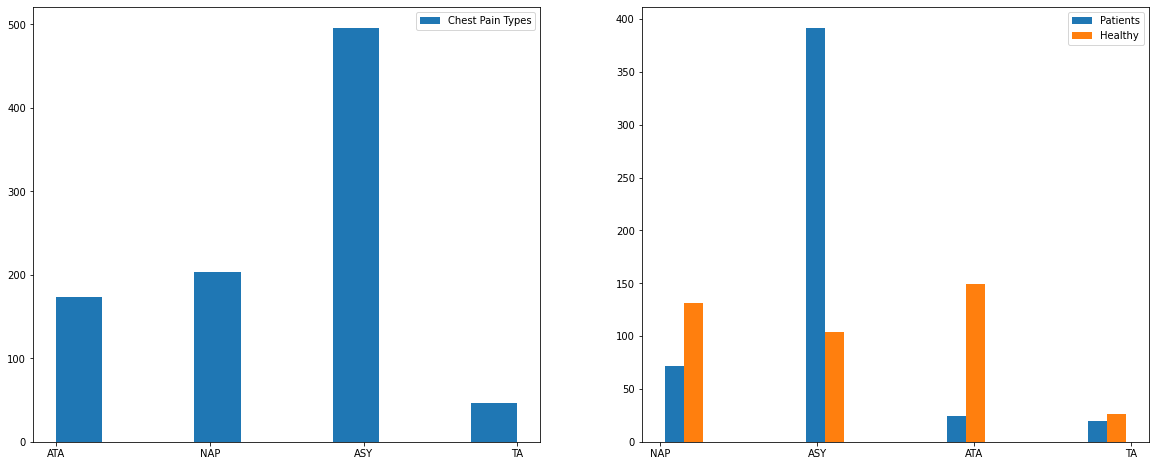

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[1].hist(
                data=heart, x=[heart[heart['HeartDisease']==1]['ChestPainType'], 
                heart[heart['HeartDisease']==0]['ChestPainType']],
                label=['Patients', 'Healthy']
            )
ax[1].legend()
ax[0].hist(
    data = heart, x='ChestPainType', label = 'Chest Pain Types'
)
ax[0].legend()
# plt.show()

**conclusion; Above Graphs show that Chest Pain of type 'ASY' is most common among Heart Patients.**

Let's plot ASY type Chest Pain with other features in heart patients

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'RestingBP'}, xlabel='ChestPainType', ylabel='RestingBP'>

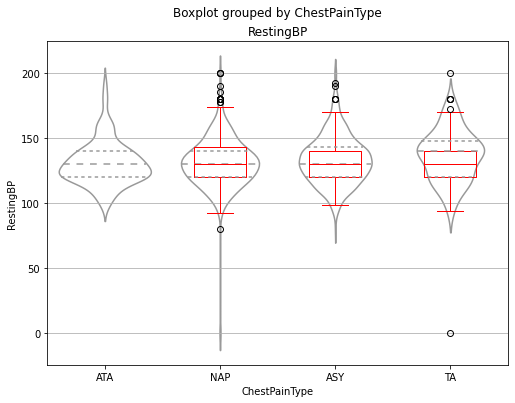

In [97]:
fig, ax = plt.subplots(1,figsize=(8,6))
heart.boxplot(by='ChestPainType', column='RestingBP', color='red', ax=ax)
sns.violinplot(heart.ChestPainType, heart.RestingBP, inner='quartile', color='white', ax=ax)
# ax.plot(heart['RestingBP'])
# heart[heart['ChestPainType']=='ASY'][['HeartDisease']].plot(figsize=(14,6))

#### **HeartDisease vs RestingBP**

<AxesSubplot:ylabel='Frequency'>

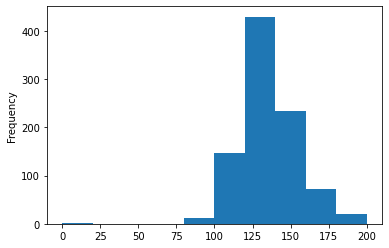

In [14]:
heart['RestingBP'].plot.hist()

I ploted above histogram just to chaeck what %age of guys have high Resting BP

Now, let's see healthy and patients persons in each blood pressure range

In [18]:
len(heart['RestingBP'].unique())

67

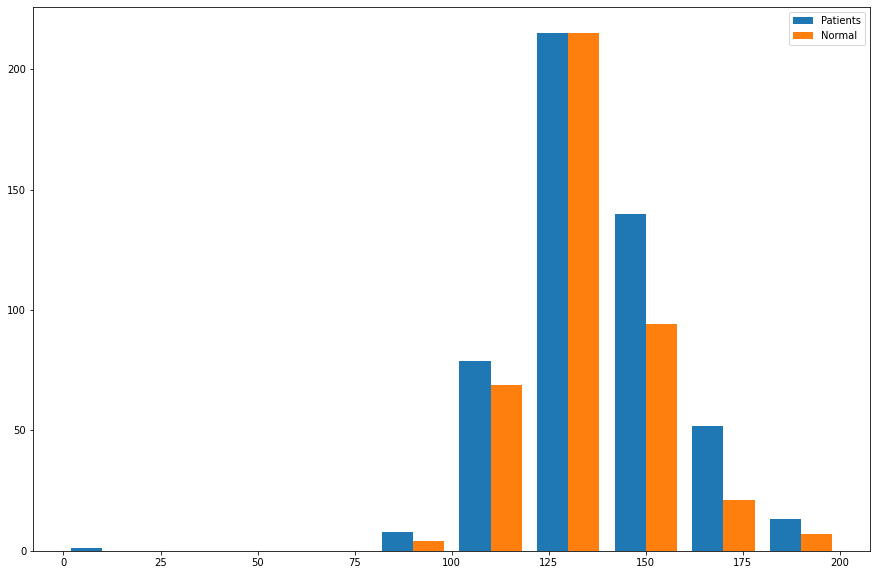

In [26]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax.hist(data=heart, x = [heart[heart['HeartDisease']==1]['RestingBP'], heart[heart['HeartDisease']==0]['RestingBP']],
                label=['Patients', 'Normal'])
ax.legend()

in each category there are more patients than healthy people

**conclusions;** 
- **each BP category has patients and normal people**
- **there are more patients than normal people in each BP category**
- **this reflects BP as a sign than a cause**
- **BP variations may have several causes i.e tasks including activity**

*I'll plot BP against Chest Pain Type.But, first let's see other features' relations with HeartDisease.*

`Since most common Chest Pain Type is ASY in patients, I'll plot this against BP.`

#### **Sex vs HeartDisease**

In [27]:
# let's see next columns to b plotted
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HeartRatePct'],
      dtype='object')

Let's see how Disease possibility is distributed accross sexes

Text(0, 0.5, 'Count')

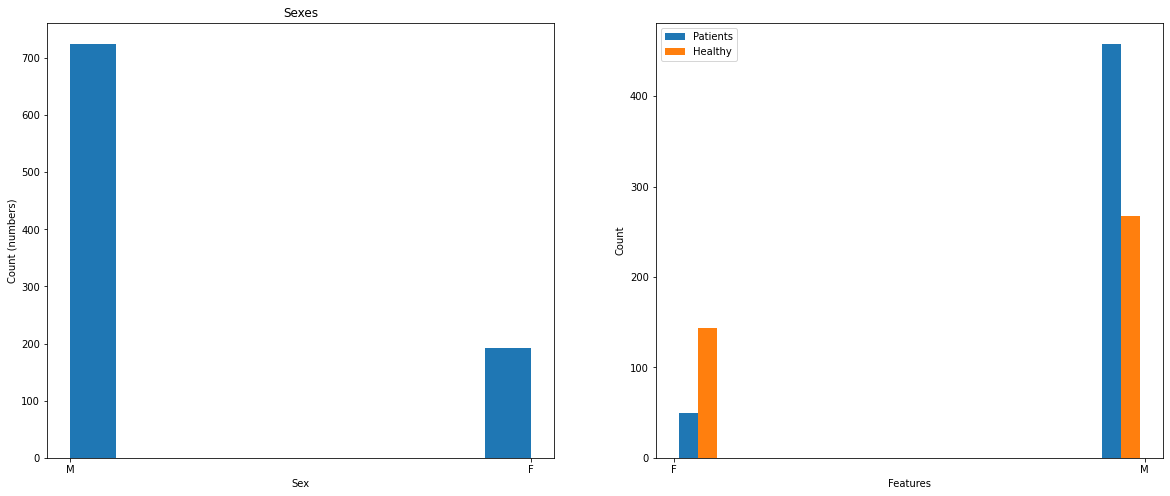

In [36]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='Sex')
ax[0].set_title('Sexes')
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['Sex'], heart[heart['HeartDisease']==0]['Sex']], label=['Patients', 'Healthy'])
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

The plots show that there are more Male-patients than Female-patients.

But, we can also see that There are more men than women in the Dataset.

we can campare the ratio to check whether 'Sex' actually has some relation with HeartDisease

simply put; difference-of-total-male-female-persons-number:difference-of-male-female-patients-number

In [50]:
tmales = heart[heart['Sex']=='M']['Sex'].count()
tfemales = heart[heart['Sex']=='F']['Sex'].count()
pmales = heart[(heart['Sex']=='M')  & (heart['HeartDisease']==1)]['Sex'].count()
pfemales = heart[(heart['Sex']=='F') &  (heart['HeartDisease']==1)]['Sex'].count()
normal = round(tmales/tfemales)
patients = round(pmales/pfemales)
print('males to females ratio in total dataset: ', normal)
print('males to females ratio in patients: ', patients)

males to females ratio in total dataset:  4
males to females ratio in patients:  9


This difference of male to female ratio in total and male to females ratio in patients reflects that there is some correlation b/w Sex and Heart Diseases.

Let's confirm this by checking normal and patients ratio in a single sex i.e normal females vs patien females

In [54]:
pct_males = (pmales/tmales)*100 #patient males by total males
pct_females = (pfemales/tfemales)*100 #patient females by total females
print('patient-males/total-males: ', pct_males)
print('patient-females/total-females: ', pct_females)

patient-males/total-males:  63.172413793103445
patient-females/total-females:  25.906735751295333


- out of total males 63% were heart patients
- out of total females 26% were heart patients

**conclusion; Heart Disease is more common in males than in females.**

`Yet Sex can't be used as a criteria for Heart Disease Prediction.`

#### **Cholesterol vs HeartDisease**

Text(0, 0.5, 'Count')

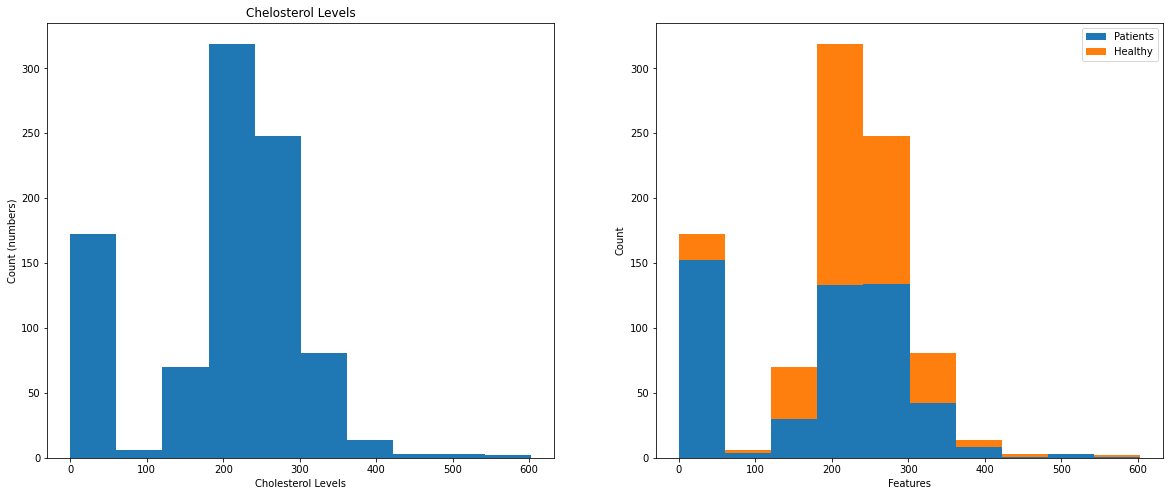

In [58]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='Cholesterol')
ax[0].set_title('Chelosterol Levels')
ax[0].set_xlabel('Cholesterol Levels')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['Cholesterol'], heart[heart['HeartDisease']==0]['Cholesterol']], label=['Patients', 'Healthy'], stacked=True)
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

**conclusion;**
- **most of the people have Cholesterol b/w 0 to 50.**
- **about 50% patients had cholesterol b/w 180 and 300**

`Cholesterol and Blood Sugar[BS] have some relation. I'll explore them once related all features to HeartDisease`

#### **FastingBS vs HeartDisease**

Text(0, 0.5, 'Count')

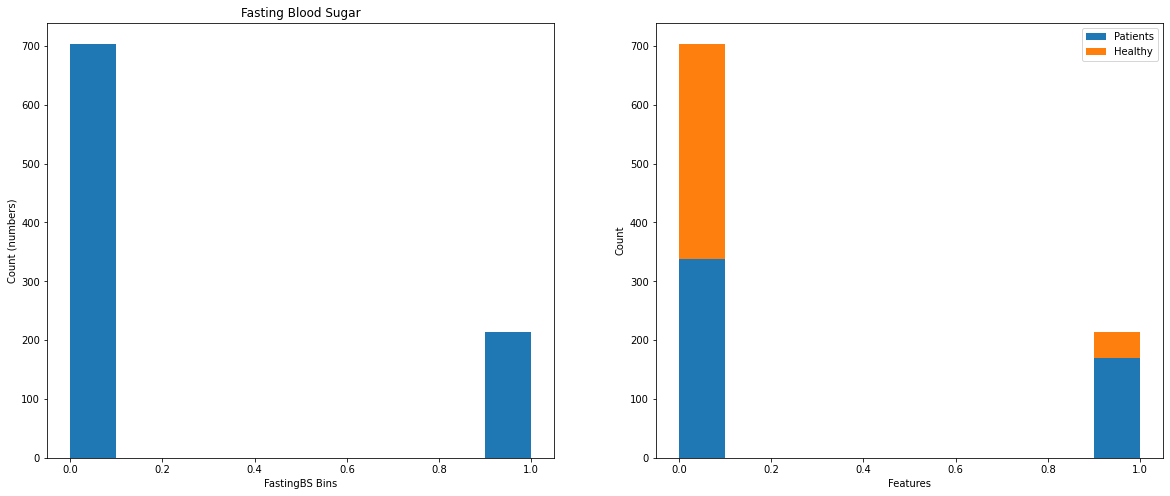

In [60]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='FastingBS')
ax[0].set_title('Fasting Blood Sugar')
ax[0].set_xlabel('FastingBS Bins')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['FastingBS'], heart[heart['HeartDisease']==0]['FastingBS']], stacked=True, label=['Patients', 'Healthy'])
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

In [64]:
print('no. of healthy people with no FastinBS', heart[(heart['FastingBS']==0) &  (heart['HeartDisease']==0)]['FastingBS'].count())

no. of healthy people with no FastinBS 366


In [65]:
print('no. of healthy people with +ve FastinBS', heart[(heart['FastingBS']==1) &  (heart['HeartDisease']==0)]['FastingBS'].count())

no. of healthy people with +ve FastinBS 44


In [66]:
print('no. of patients with no FastinBS', heart[(heart['FastingBS']==0) &  (heart['HeartDisease']==1)]['FastingBS'].count())

no. of patients with no FastinBS 338


In [67]:
print('no. of patients with +ve FastinBS', heart[(heart['FastingBS']==1) &  (heart['HeartDisease']==1)]['FastingBS'].count())

no. of patients with +ve FastinBS 170


**conclusions;**
- **about 10% healthy peaople had +ve Fasting Blood Sugar**
- **about 50% patients had +ve Fasting Blood Sugar**
- `+ve blood sugar is a factor for cholesterol and heart diseases`
- `normal people with +ve blood sugar may not had developed high cholesterol levels`

`FastingBS can be plotted with other features`

#### **RestingECG vs HeartDisease**

In [68]:
heart['RestingECG'].head()

0    Normal
1    Normal
2        ST
3    Normal
4    Normal
Name: RestingECG, dtype: object

Text(0, 0.5, 'Count')

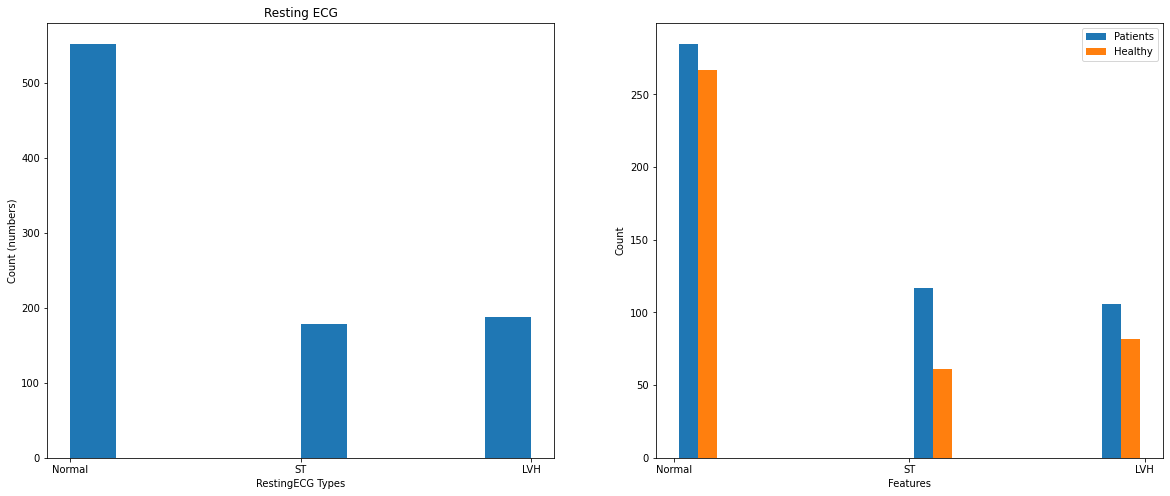

In [69]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].hist(data=heart, x='RestingECG')
ax[0].set_title('Resting ECG')
ax[0].set_xlabel('RestingECG Types')
ax[0].set_ylabel('Count (numbers)')
ax[1].hist(data=heart, x=[heart[heart['HeartDisease']==1]['RestingECG'], heart[heart['HeartDisease']==0]['RestingECG']], label=['Patients', 'Healthy'])
ax[1].legend()
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Count')

There are heart patients in each ECG category

**conclusions;**
- **Heart Patients had each type of ECG i.e Normal, ST, LVH**
- **There are still more patients with normal ECG**

`RestingECG can be plotted along other features`